Plotting data from `sum_crg.out`
---
An example of using `matplotlib` to plot data from `sum_crg.out`. First we import the relevant modules.

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


Read in the data and create relevant arrays. This step is a little tricky because numpy can not read such file. 

In [100]:
ph_range = []
residue_data = {}

with open("sum_crg.out", "r") as data:
    lines = data.readlines()
    header = lines[0].split(" ")
    for col in header:
        if col not in ["", "pH"]:
            ph_range.append(int(col))
    residue_lines = lines[1:-4]
    for line in residue_lines:
        res_line = line.strip("\n").split(" ")
        res_vals = []
        for val in res_line[1:]:
            if val != "":
                res_vals.append(float(val))
        residue_data[res_line[0]] = np.asarray(res_vals)
ph_range = np.asarray(ph_range)


Now we have all the right data in the right place. Our x values are in the `ph_range` array and our y values are in the `residue_data` dictionary, so that for each residue we can access the charges at different pH using its name from the `sum_crg.out` file.


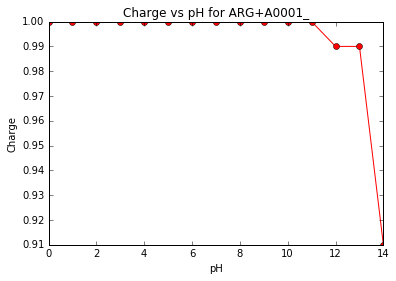

In [104]:
group_of_interest = 'ARG+A0001_'
plt.plot(ph_range, residue_data[group_of_interest], '-ro')
plt.xlabel("pH")
plt.ylabel("Charge")
plt.title("Charge vs pH for %s" % group_of_interest)